In [1]:
# Directories
import os

new_directory = r'c://Users//Fer//TESIS_ARCHIVOS//TESIS_AIRE//MP_Forecasting//aqi_forecasting//notebooks'
os.chdir(new_directory)

# Data Manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Optuna
import optuna
import pickle

# Tiempo
import datetime as dt
from dateutil.relativedelta import relativedelta, MO


# Metricas
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error #MAPE
from sklearn.metrics import mean_squared_error #MSE, para RMSE: squared = False

# Visualizations
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt
import seaborn as sn

# Advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
datos = pd.read_csv('datos/230127_train_ESTACIONES.csv', parse_dates = ['FECHAHORA'])
validacion = pd.read_csv('datos/230127_test_ESTACIONES.csv')

In [3]:
lista=[datos,validacion]
prueba = pd.concat(lista)

prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580842 entries, 0 to 264959
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ESTACION                1580842 non-null  int64  
 1   FECHAHORA               1580842 non-null  object 
 2   ANHO                    1580842 non-null  int64  
 3   DIA                     1580842 non-null  int64  
 4   MES                     1580842 non-null  int64  
 5   HORA                    1580842 non-null  int64  
 6   MINUTO                  1580842 non-null  int64  
 7   MP1                     1580842 non-null  float64
 8   MP2_5                   1580842 non-null  float64
 9   MP10                    1580842 non-null  float64
 10  TEMPERATURA             1580842 non-null  float64
 11  HUMEDAD                 1580842 non-null  float64
 12  PRESION                 1580842 non-null  float64
 13  DIA_TRAF_COD            1580842 non-null  object 
 14  TRA

In [15]:
df_heatmap = datos[['ANHO', 'DIA', 'MES', 'HORA', 'MINUTO',
       'MP1', 'MP2_5', 'MP10', 'TEMPERATURA', 'HUMEDAD', 'PRESION',
       'TRAFICO', 'DIA_SEM',
       'AQI_MP2_5', 'AQI_MP10']]

#df_heatmap = df_heatmap[df_heatmap['ESTACION'] == 4]
df_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315882 entries, 0 to 1315881
Data columns (total 15 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ANHO         1315882 non-null  int64  
 1   DIA          1315882 non-null  int64  
 2   MES          1315882 non-null  int64  
 3   HORA         1315882 non-null  int64  
 4   MINUTO       1315882 non-null  int64  
 5   MP1          1315882 non-null  float64
 6   MP2_5        1315882 non-null  float64
 7   MP10         1315882 non-null  float64
 8   TEMPERATURA  1315882 non-null  float64
 9   HUMEDAD      1315882 non-null  float64
 10  PRESION      1315882 non-null  float64
 11  TRAFICO      1315882 non-null  int64  
 12  DIA_SEM      1315882 non-null  int64  
 13  AQI_MP2_5    1315882 non-null  float64
 14  AQI_MP10     1315882 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 150.6 MB


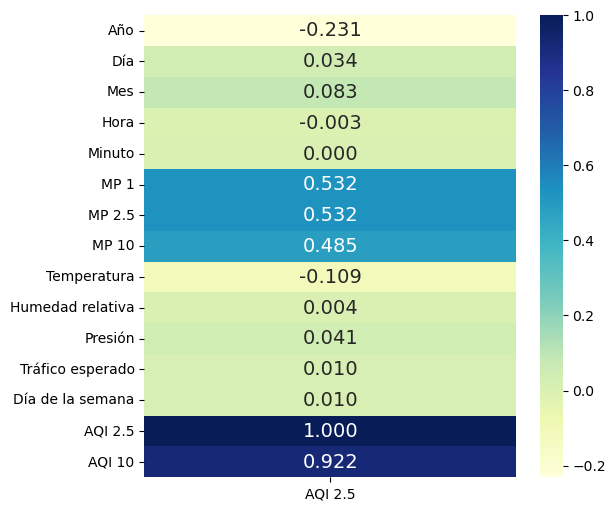

In [13]:
import matplotlib.pyplot as mp

df_heatmap.rename(columns={'ANHO': 'Año', 'DIA': 'Día', 'MES': 'Mes', 'HORA': 'Hora', 'MINUTO': 'Minuto',
       'MP1': 'MP 1', 'MP2_5': 'MP 2.5', 'MP10': 'MP 10', 'TEMPERATURA': 'Temperatura', 'HUMEDAD': 'Humedad relativa', 'PRESION': 'Presión',
       'TRAFICO': 'Tráfico esperado', 'DIA_SEM': 'Día de la semana',
       'AQI_MP2_5': 'AQI 2.5', 'AQI_MP10': 'AQI 10'}, inplace=True)

corrMatrix = df_heatmap.corr(method='spearman')

df = pd.DataFrame(corrMatrix['AQI 2.5'],
              index=corrMatrix.index)

fig, ax = plt.subplots(figsize=(6, 6))

sn.heatmap(df, annot=True, fmt = '.3f', cmap='YlGnBu', annot_kws={"size": 14})

plt.show()


# print(df_heatmap.corr().AQI_MP2_5)

# fig, ax = plt.subplots(figsize=(20,20)) 
# # plotting correlation heatmap
# dataplot = sn.heatmap(df_heatmap.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
#dataplot.show()


# columns = ['AQI_MP2_5']
# myaqi = df_heatmap.copy()
# mask = myaqi.columns.isin(columns)
# myaqi = myaqi.loc[:, mask]
# arr = df_heatmap.values
# vmin, vmax = arr.min(), arr.max()
# sn.heatmap(df_heatmap, mask=myaqi, annot=True, fmt="d", vmin=vmin, vmax=vmax)

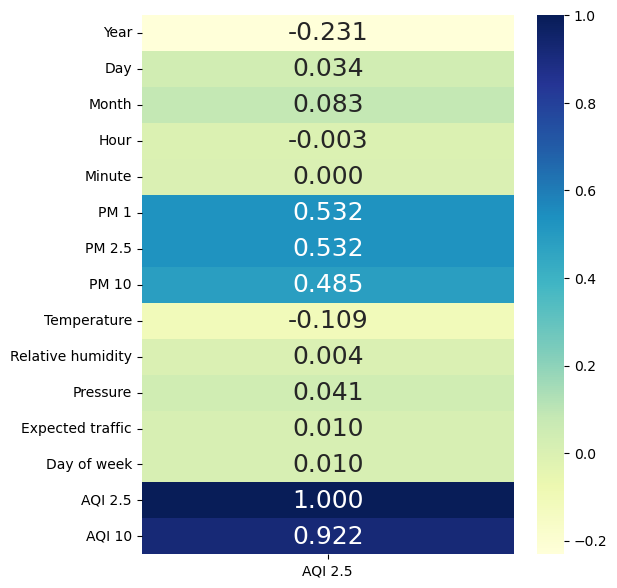

In [18]:
# english

import matplotlib.pyplot as mp

df_heatmap.rename(columns={'ANHO': 'Year', 'DIA': 'Day', 'MES': 'Month', 'HORA': 'Hour', 'MINUTO': 'Minute',
       'MP1': 'PM 1', 'MP2_5': 'PM 2.5', 'MP10': 'PM 10', 'TEMPERATURA': 'Temperature', 'HUMEDAD': 'Relative humidity', 'PRESION': 'Pressure',
       'TRAFICO': 'Expected traffic', 'DIA_SEM': 'Day of week',
       'AQI_MP2_5': 'AQI 2.5', 'AQI_MP10': 'AQI 10'}, inplace=True)

corrMatrix = df_heatmap.corr(method='spearman')

df = pd.DataFrame(corrMatrix['AQI 2.5'],
              index=corrMatrix.index)

fig, ax = plt.subplots(figsize=(6, 7))

sn.heatmap(df, annot=True, fmt = '.3f', cmap='YlGnBu', annot_kws={"size": 18})

plt.show()